In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [3]:
df = pd.read_csv('titanic.csv')

In [5]:
df.shape

(891, 12)

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Xét tính liên tục

In [7]:
Range = np.ptp(df['Fare'])
Range

512.3292

In [9]:
import scipy

In [11]:
Q1 = np.quantile(df['Fare'].dropna(), 0.25)
Q1

7.9104

In [12]:
Q3 = np.quantile(df['Fare'].dropna(), 0.75)
Q3

31.0

In [14]:
IQR = Q3 - Q1
IQR

23.0896

In [15]:
df[['Fare', 'Age']].quantile([0.025, 0.05, .1, .2, .5, .7, .9, .99])

,Fare,Age
0.025,6.75000,2.00
0.050,7.22500,4.00
0.100,7.55000,14.00
0.200,7.85420,19.00
0.500,14.45420,28.00
0.700,27.00000,36.00
0.900,77.95830,50.00
0.990,249.00622,65.87


In [16]:
#categorical

In [18]:
value_count = df['Pclass'].value_counts()
value_count

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:>

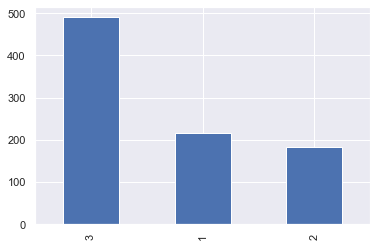

In [20]:
sns.set()
value_count.plot.bar()

In [21]:
classes =(df.groupby('Pclass').count())['PassengerId']
classes

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

In [27]:
# Pclass và Sex
table = pd.crosstab(df['Pclass'], df['Sex'])

In [28]:
# using chi-square
from scipy.stats import chi2_contingency, chi2

In [29]:
stat, p, dof, expected = chi2_contingency(table)

In [30]:
dof

2

In [31]:
# sử dung statistic => tính critical value
prob= 0.95
critical = chi2.ppf(prob,dof)
critical

5.991464547107979

In [32]:
if abs(stat) >= critical:
    print("Dependent (reject H0)")
else:
    print("Independent (fial to reject H0)")
        

Dependent (reject H0)


In [ ]:
# sử dụng p_value
